<a href="https://colab.research.google.com/github/bhadreshpsavani/ExploringComputerVision/blob/main/notebook/Understanding_Shift_Operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Shift Operation:

From [When Shift Operation Meets Vision Transformer: An Extremely Simple Alternative to Attention Mechanism](https://arxiv.org/abs/2201.10801)


In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [77]:
def shift(feat, gamma=1/12):
  # feat is a tensor with a shape of
  # [Batch, Channel, Height, Width]
  B, C, H, W = feat.shape
  g = int(gamma * C)
  out = np.zeros(feat.shape)
  x = feat.copy()
  # spatially shift
  out[:, 0*g:1*g, :, :-1] = x[:, 0*g:1*g, :, 1:]
  out[:, 1*g:2*g, :, 1:] = x[:, 1*g:2*g, :, :-1]
  out[:, 2*g:3*g, :-1, :] = x[:, 2*g:3*g, 1:, :]
  out[:, 3*g:4*g, 1:, :] = x[:, 3*g:4*g, :-1, :]
   # remaining channels
  out[:, 4*g:, :, :] = x[:, 4*g:, :, :]
  return out

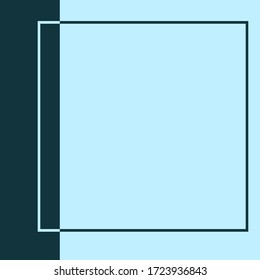

In [78]:
img = cv2.imread('/content/sample.jpg')
cv2_imshow(img)

In [79]:
img.shape

(280, 260, 3)

In [80]:
# We need to reshape it since the pseudocode expect images in batch
# we will consider batch size = 1 by reshaping it
img = img.reshape(1, 280, 260, 3)
img.shape

(1, 280, 260, 3)

In [81]:
out_img = shift(img)

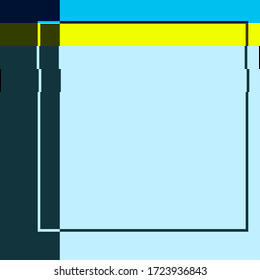

In [82]:
out_img = out_img.reshape(280, 260, 3)
img = img.reshape(280, 260, 3)
cv2_imshow(out_img)

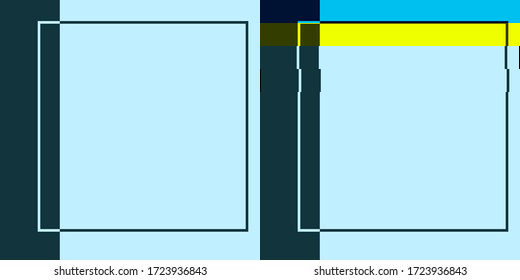

In [92]:
numpy_vertical_concat = np.concatenate((img, out_img), axis=1)
cv2_imshow(numpy_vertical_concat)

## Conclusion:

* Above operation shows that channel is shifted because of that yellow color line is shown and top few pixels are more darker
* There is a shift in verticle line as well
